In [1]:
# imports 
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from datetime import datetime, timedelta
from sklearn.datasets import make_blobs
from collections import defaultdict
from sklearn.utils import resample
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from numpy import average
import seaborn as sns
import pandas as pd
import numpy as np
import threading
import math
import os

In [2]:
new_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(new_dir)

print('In Predictive Model Folder:', os.getcwd())

In Predictive Model Folder: c:\Users\ashly\OneDrive\Documents\Education Material\ResearchProject\MaternalHealthResearch\predictive-model


Create the Sleep Threshold visualization to depict the level of analysis

In [124]:
def sleepThreshold():
    # <= 6 alert > 7  <= 9 good, execessive (can be too much)
    df = pd.read_csv('data_interim/daily_sleep_activity.csv')
    grouped = df.groupby('id') # view all 30 days 
    df['day'] = pd.to_datetime(df['date']).dt.day
    for id_, group in grouped:
        colors = []
        amt_miles = []
        amt_sleep = []
        dates = []
        inner_grouped = group.groupby(['day','total_minutes_asleep','total_distance_miles'])
        for (day_, total, miles),inner_group in inner_grouped:
            amt = total // 60
            amt_miles.append(miles)
            amt_sleep.append(amt)
            dates.append(day_)
            # Convert minutes to hours 
            if amt <= 6: # Low
                colors.append('deeppink')
            elif amt > 6 and amt <= 9:
                colors.append('darkviolet')
            else:
                colors.append('darkred')
            
        # graph the amount sleep for each id
        plt.figure(figsize=(10, 6))
        plt.grid(True)
        

        # Create a boolean mask for each section
        low_threshold = [6] * len(amt_sleep)
        high_threshold = [9] * len(amt_sleep)
        low_mask = np.array(amt_sleep) <= low_threshold
        normal_mask = (np.array(amt_sleep) > low_threshold) & (np.array(amt_sleep) <= high_threshold)
        ex_mask = np.array(amt_sleep) <= 15
        plt.fill_between(dates, amt_sleep, where=low_mask, color='deeppink', alpha=0.3, label='Low Sleep')
        plt.fill_between(dates, amt_sleep, where=normal_mask, color='darkviolet', alpha=0.3, label='Normal Sleep')
        plt.fill_between(dates, amt_sleep, where=ex_mask, color='darkred', alpha=0.3, label='Excessive Sleep') 
        
        plt.fill_between(np.array(dates), amt_sleep, np.array(amt_miles), color='skyblue', alpha=0.4, label='Activity Quantity (Miles)')
        
        
        plt.plot(dates, amt_sleep, color='pink')
        plt.plot(dates, amt_miles, color='skyblue')
        plt.scatter(dates, amt_sleep, color=colors)
        
        plt.title(f'ID: {id_} Sleep & Activity Quantity 4-12-2016 - 5-12-2016')
        plt.xlabel('Day')
        plt.ylabel('Sleep Quality')
        plt.tight_layout()
        plt.legend()
        plt.show()
        

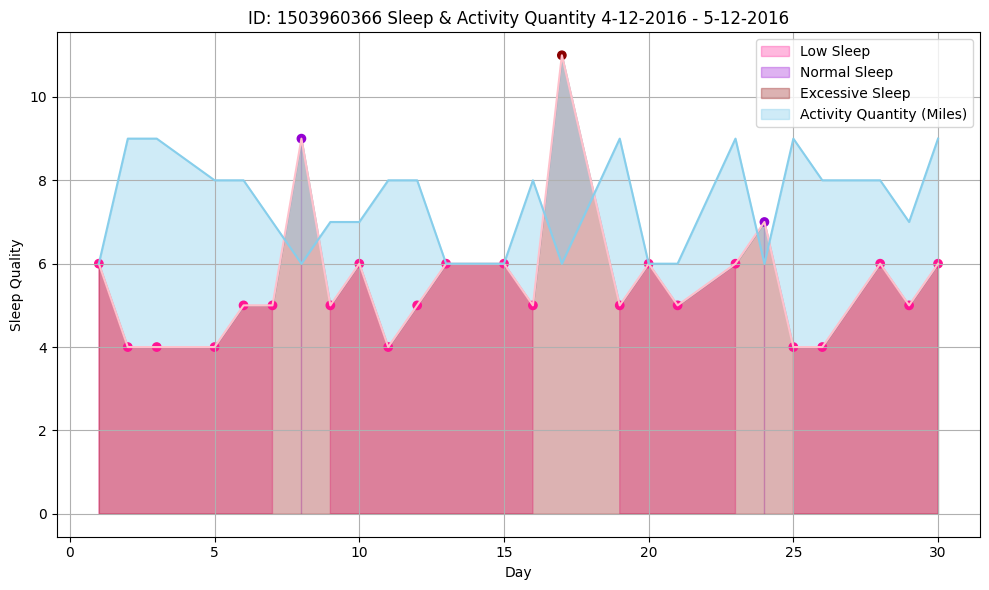

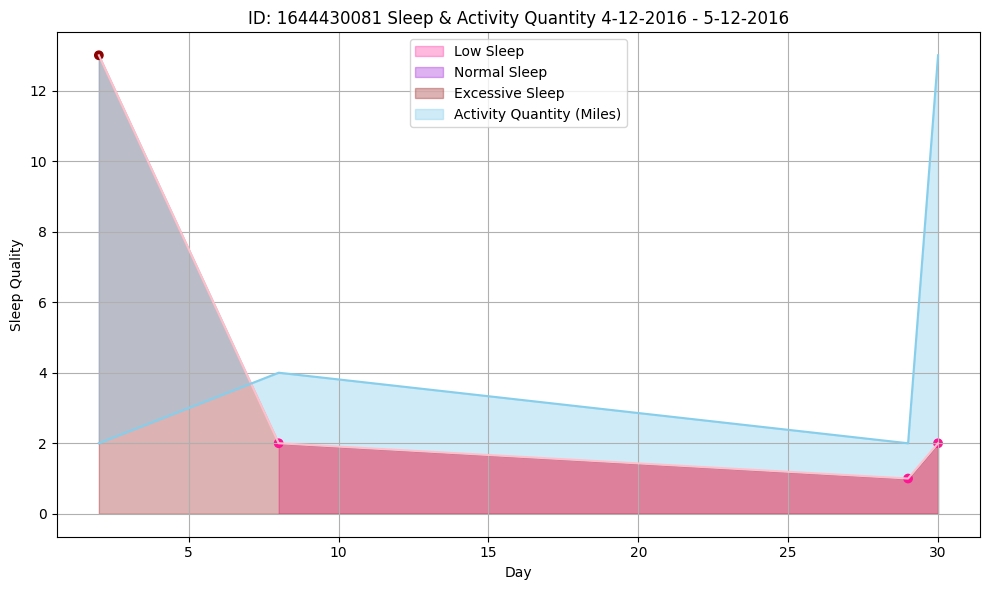

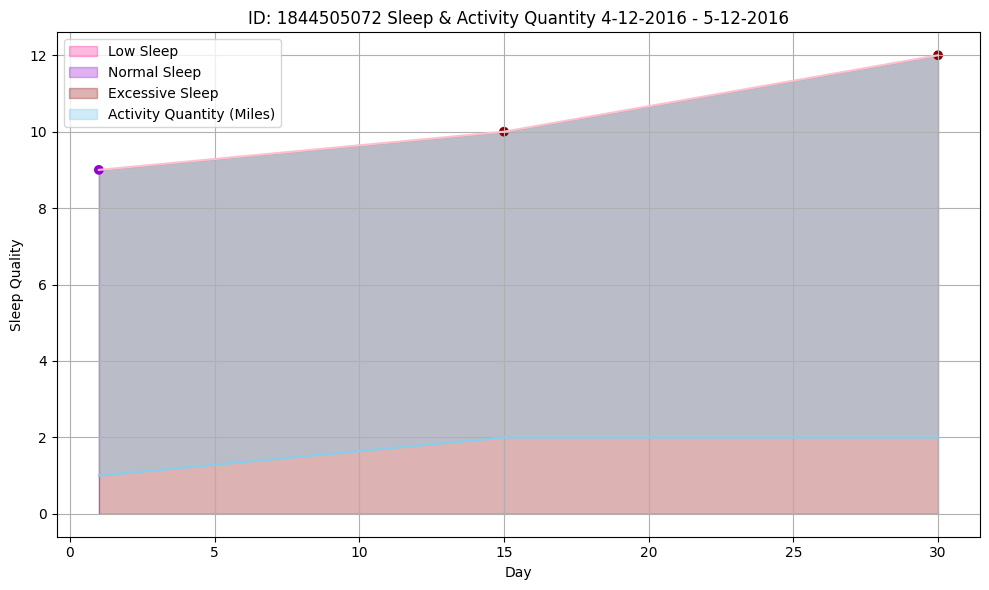

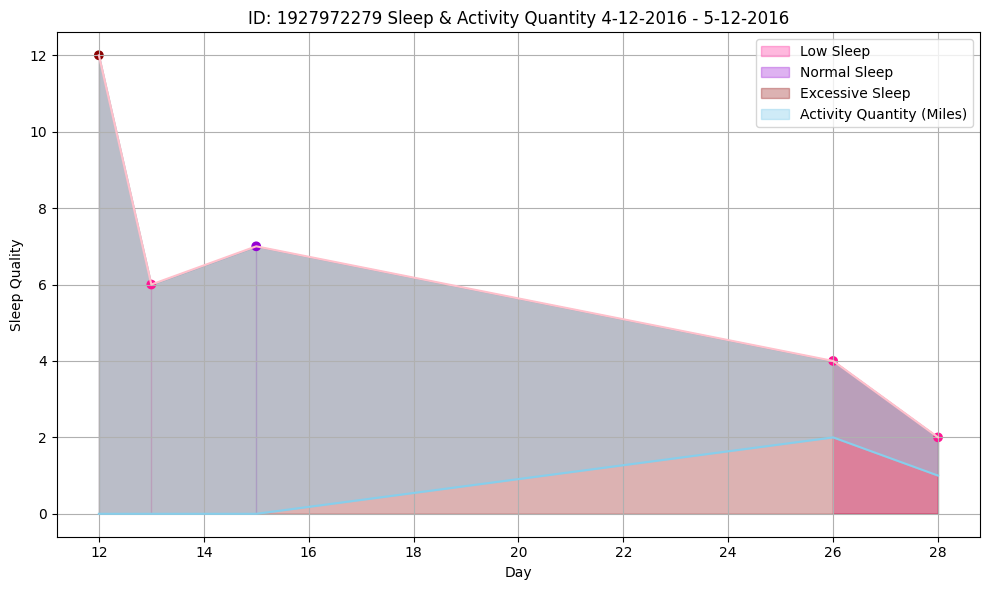

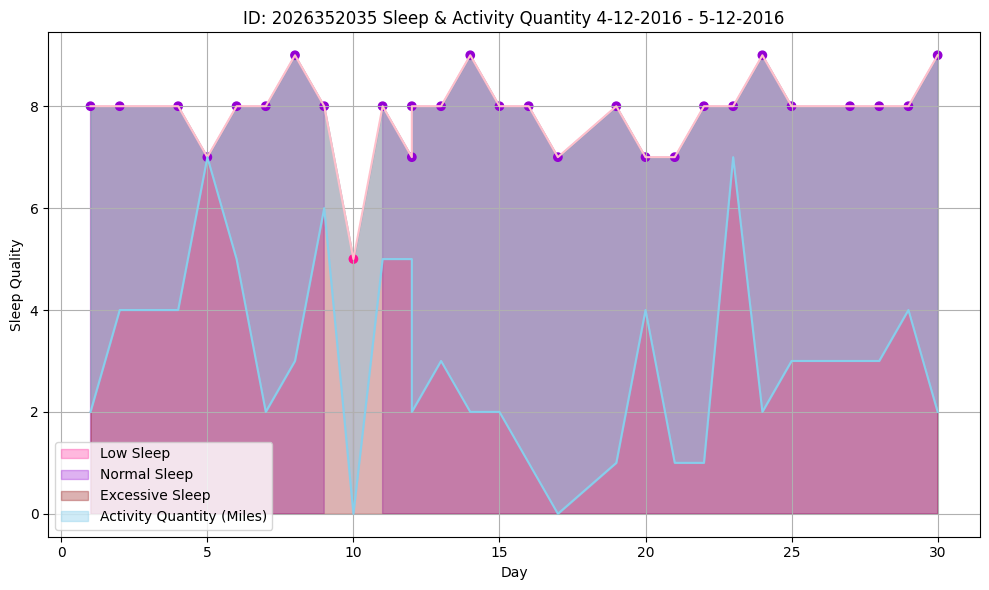

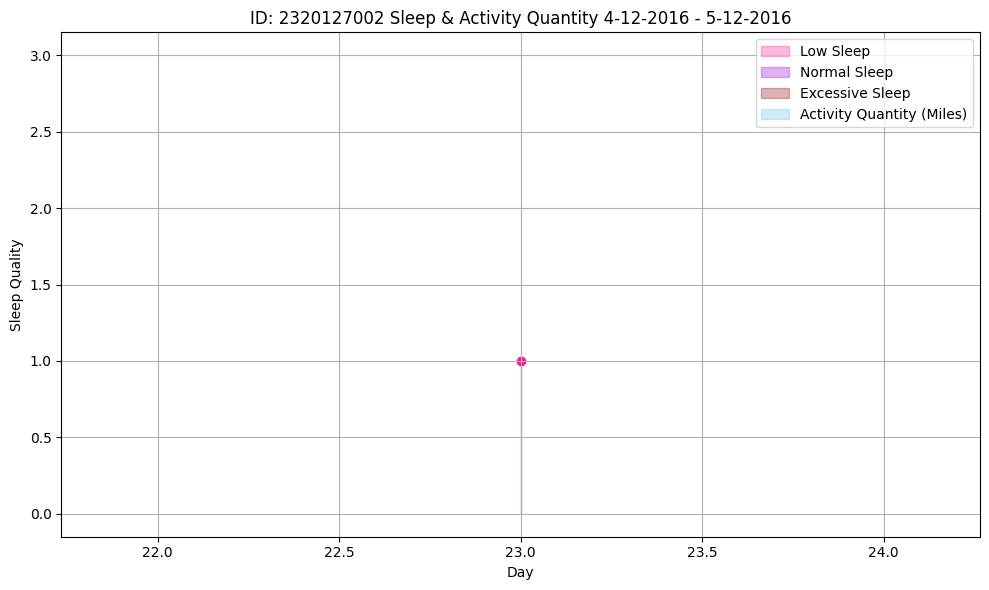

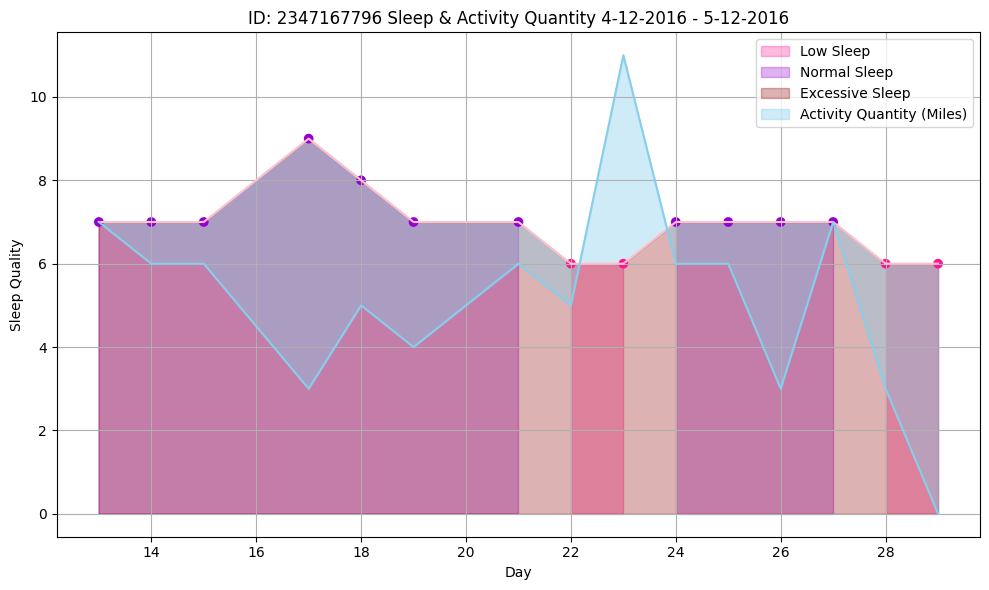

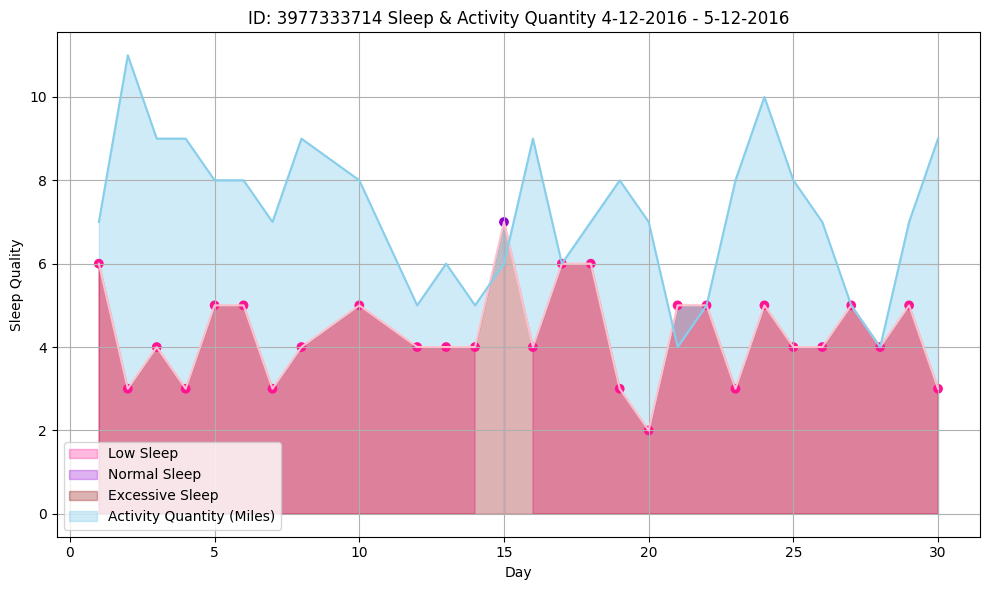

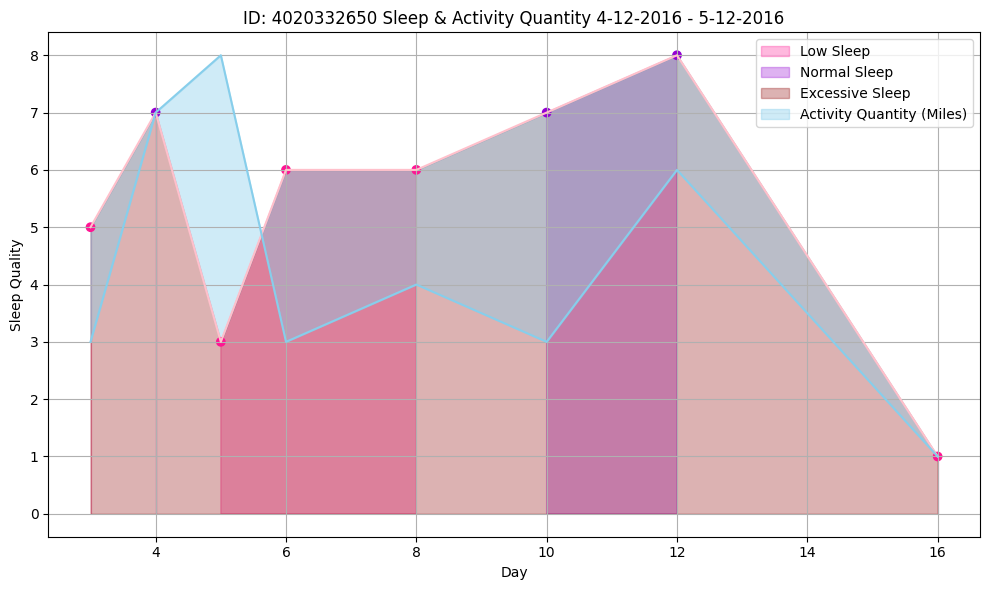

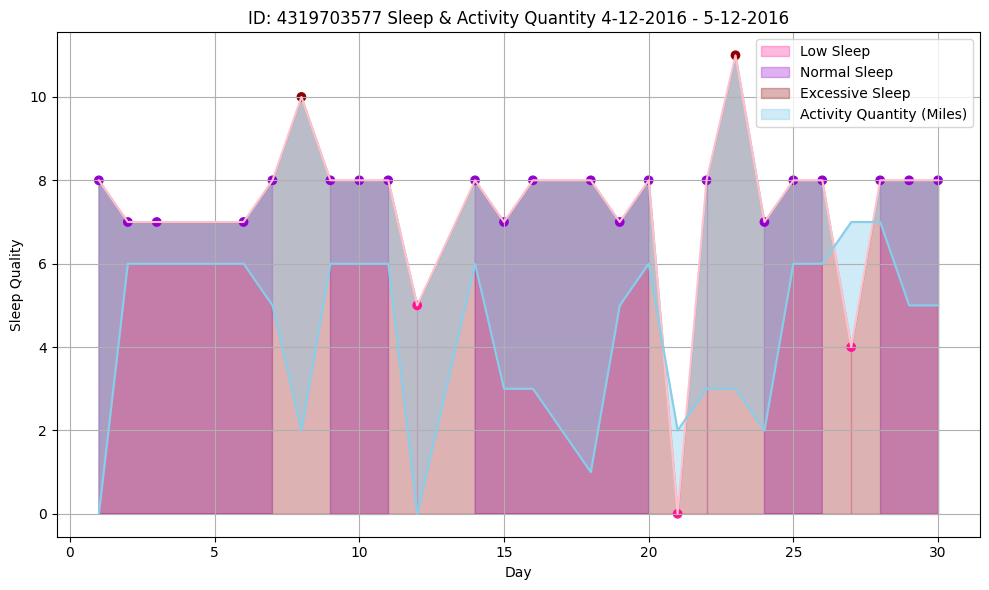

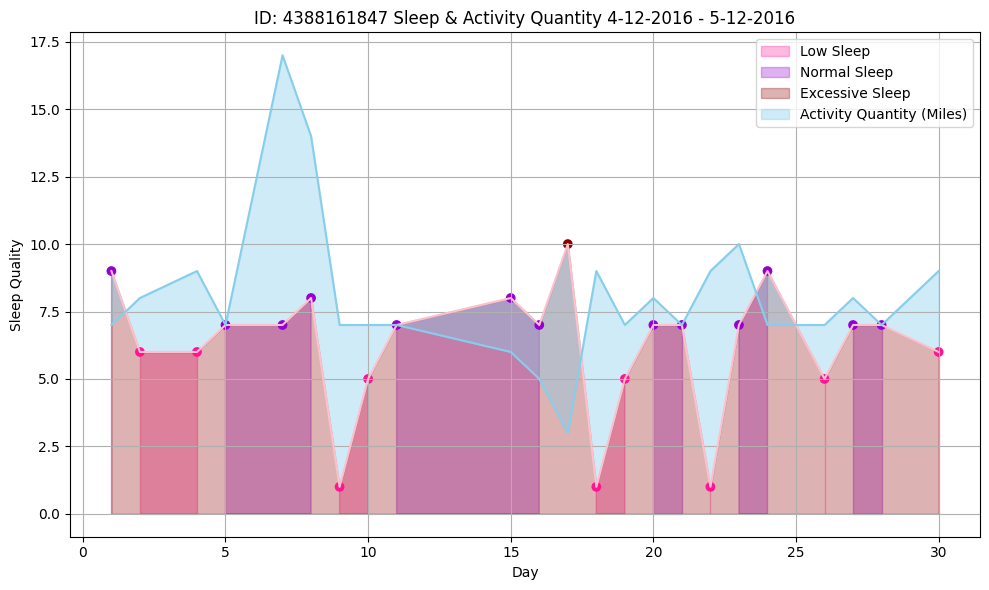

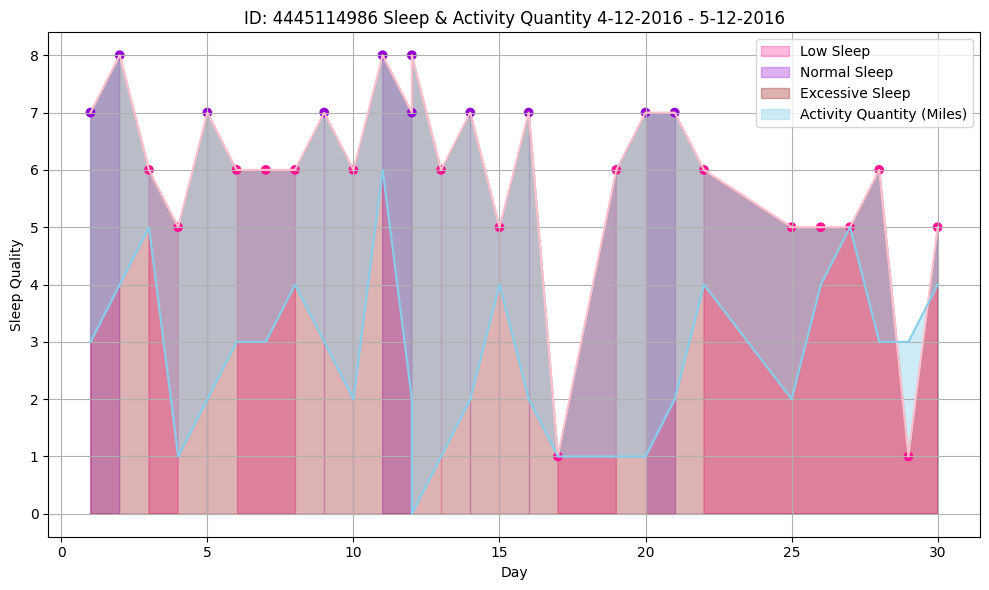

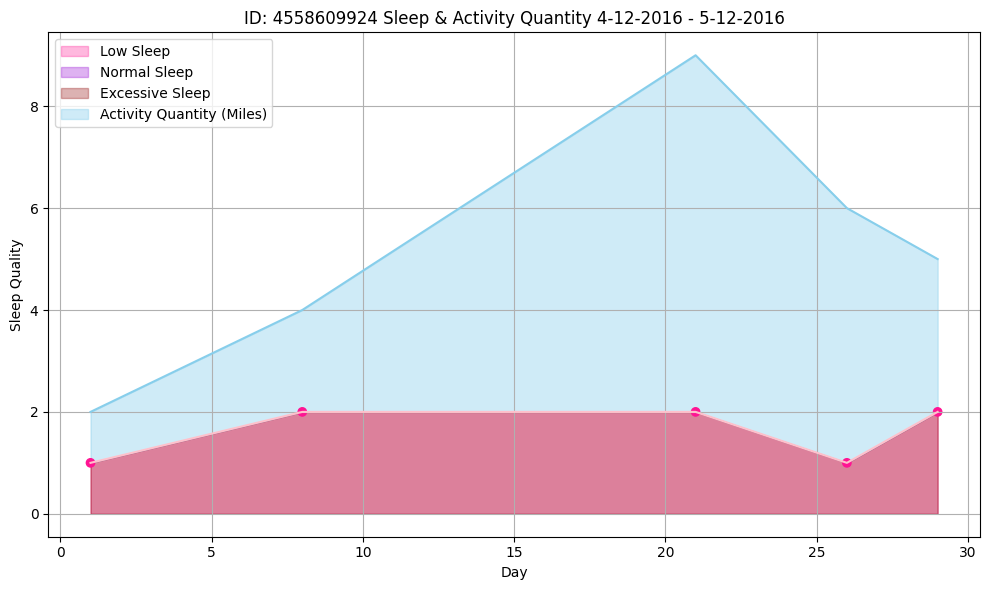

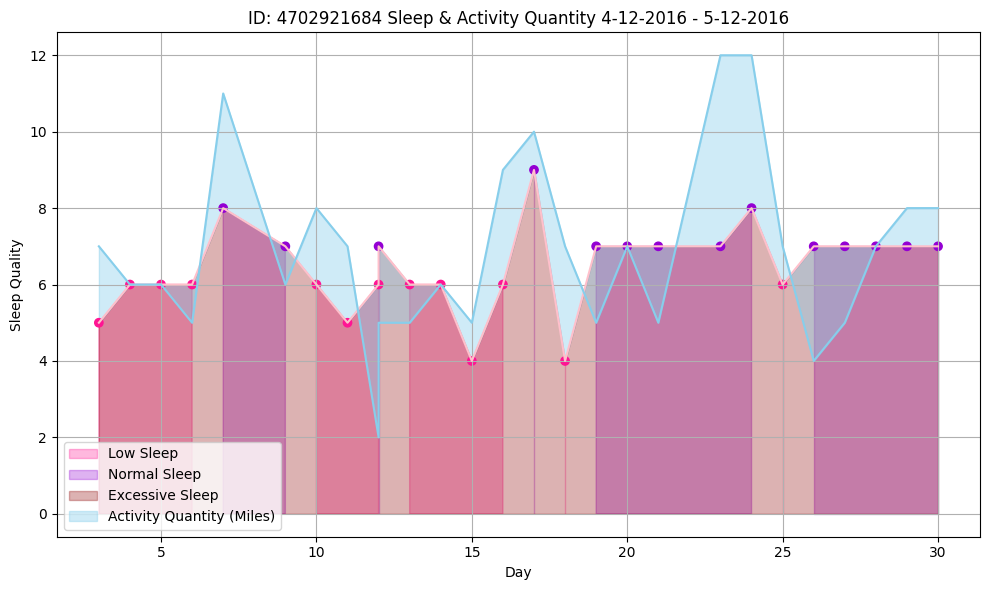

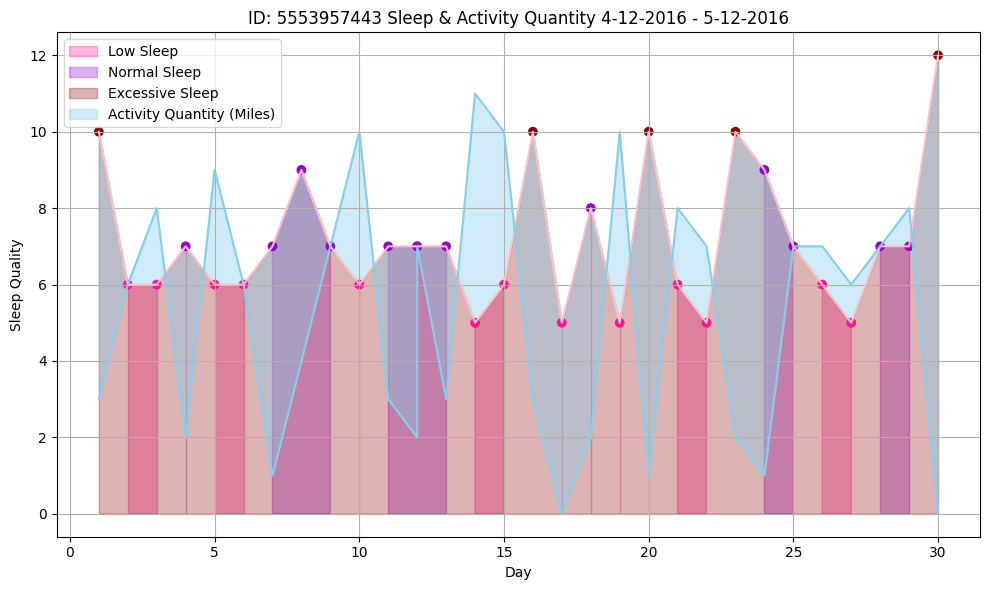

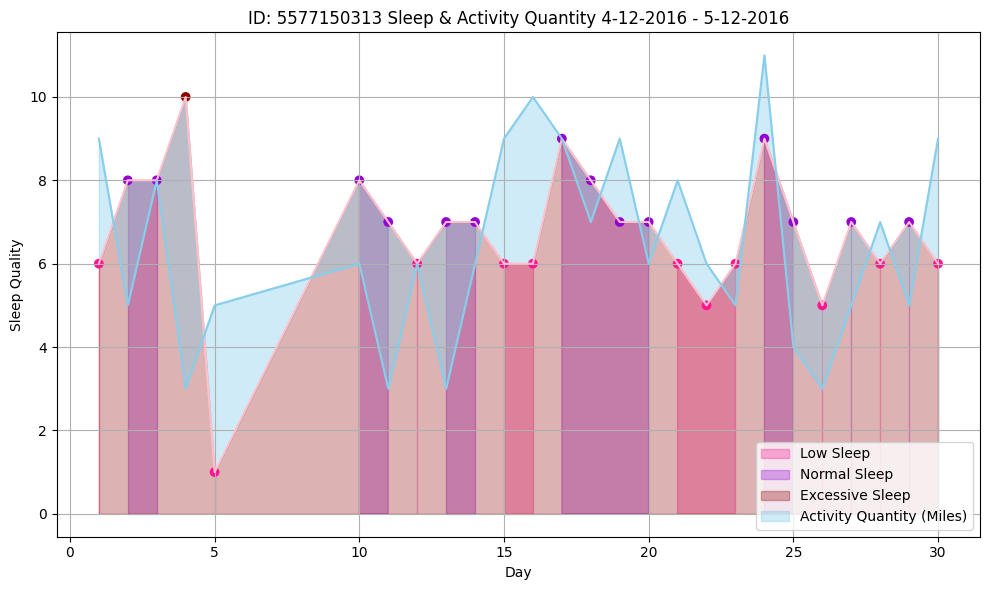

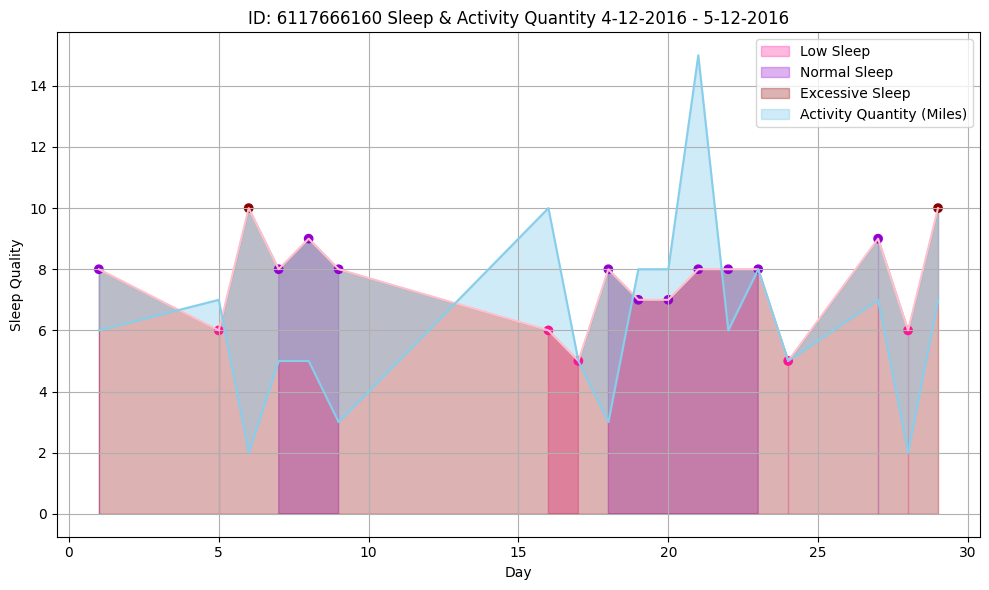

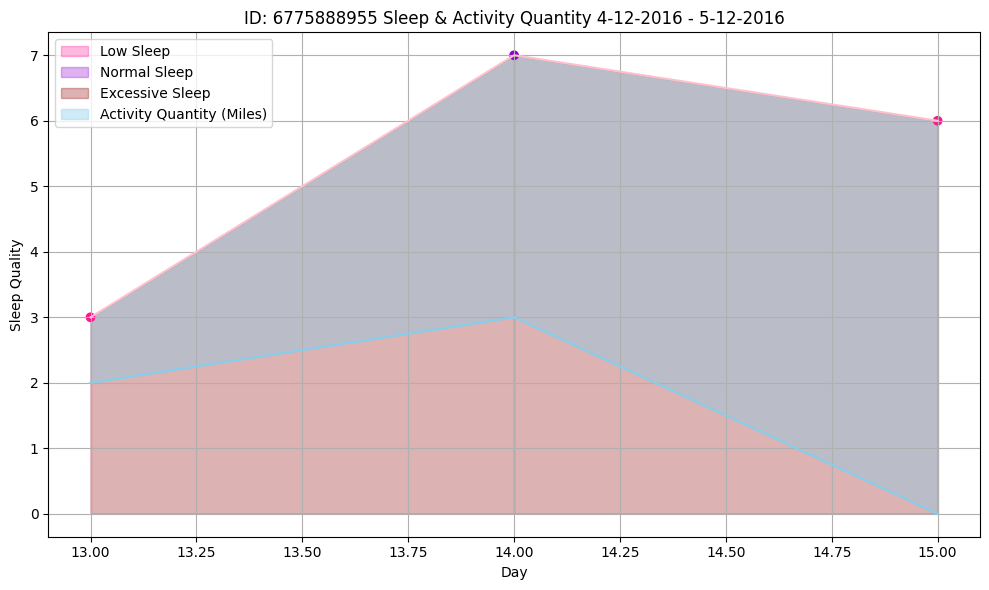

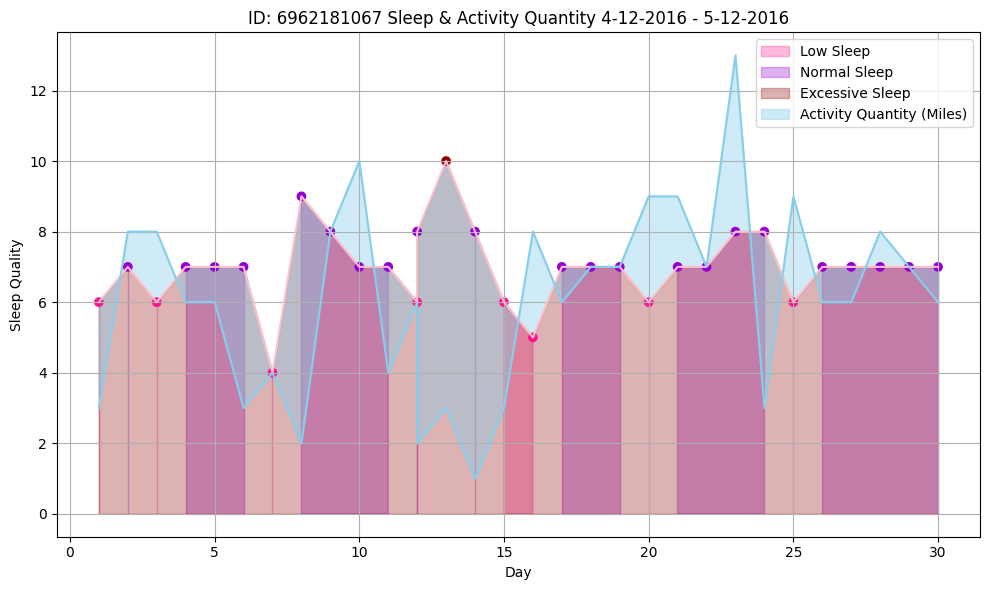

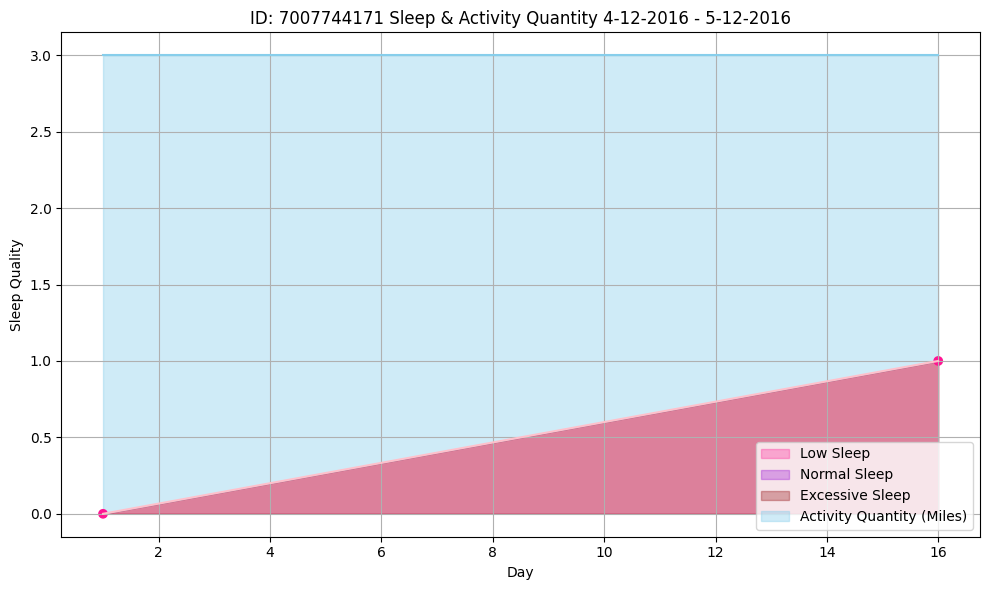

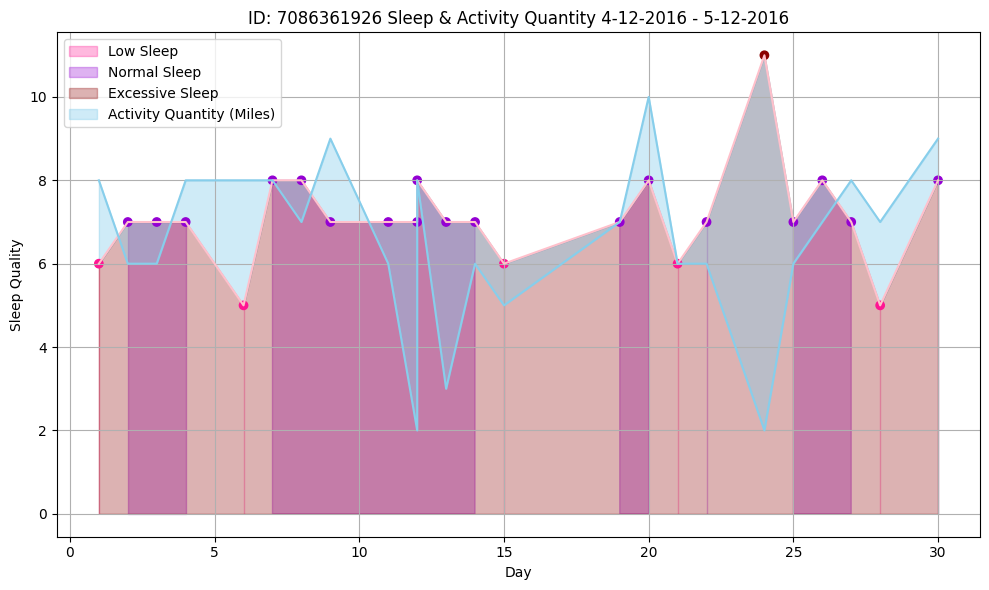

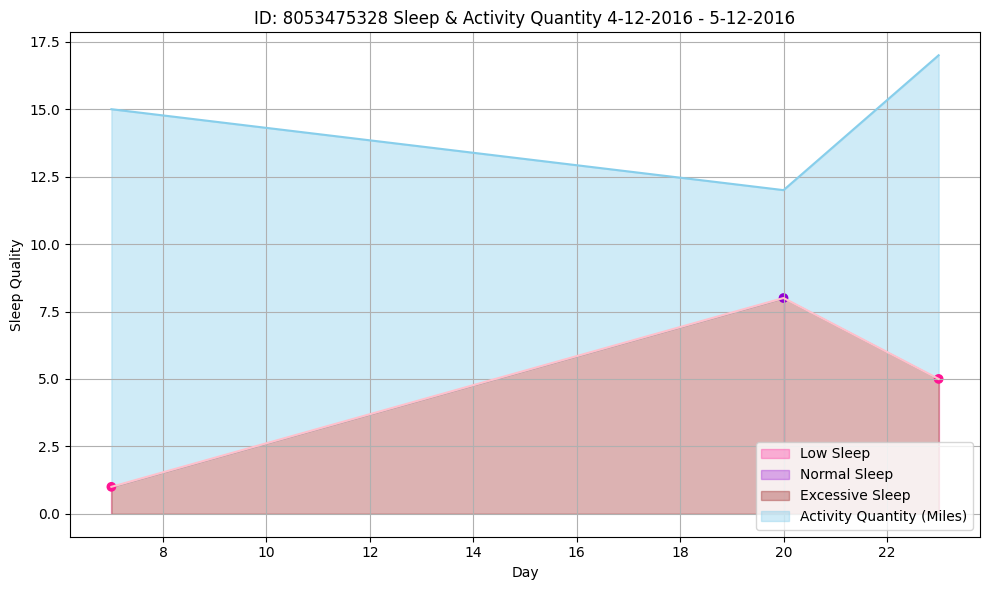

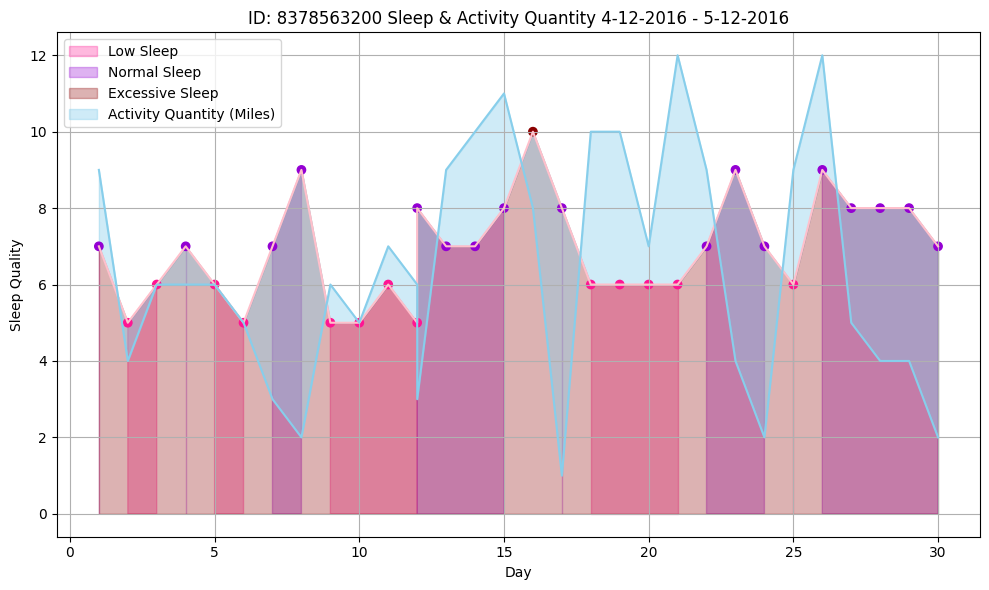

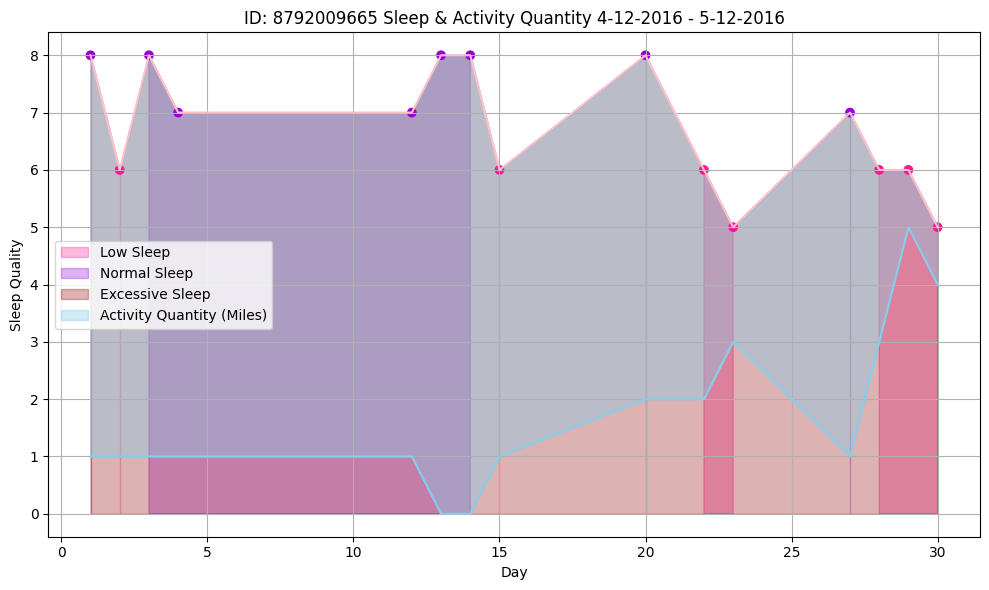

In [125]:
sleepThreshold()